In [165]:
import importlib
import experiment
importlib.reload(experiment)
import models
importlib.reload(models)

from experiment import *

In [166]:
from pathlib import Path
path = Path("./data/221219-HLM+LSM/gst-D1-HLM_VS_E3-LSM")
fs = sorted(list(path.glob("*.csv")))

controls_path = Path("./data/221219-HLM+LSM/controls")
controls_fs = sorted(list(controls_path.glob("*.csv")))
print(len(fs))
print(len(controls_fs))

17
5


Exp.params is None. Fit and offset plots are not available


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

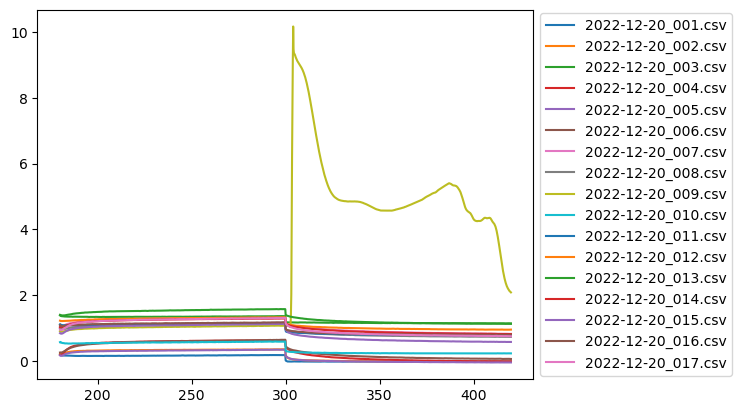

In [167]:
exp = Exp()
exp.load_bli_data(fs)
exp.plot()


Exp.params is None. Fit and offset plots are not available


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

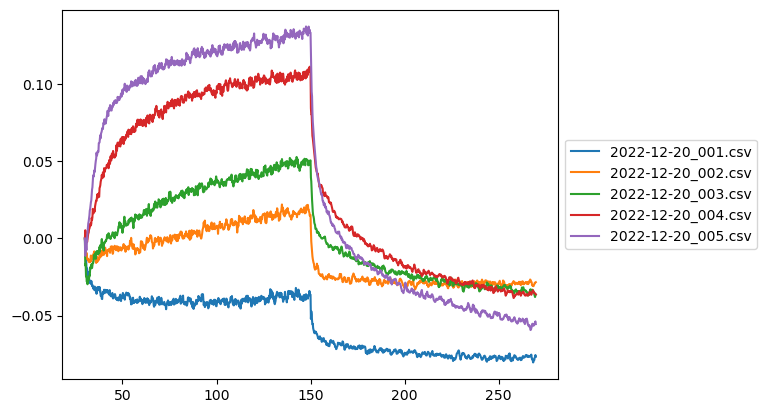

In [168]:
controls = Exp()
controls.load_bli_data(controls_fs)
controls.interstep_correction()
controls.plot()


In [169]:
#load descriptions, need to copy from blitz
desc = Path("./data/221219-HLM+LSM/dataset_description.txt")
df = pd.read_csv(desc, sep='\t', index_col=0)
df

,Show,Analyze,Ref.,Sample ID,Conc. (uM),Run time (s),Shaker speed (rpm),Integration (ms),Biosensor Type,Information,Status
Index,,,,,,,,,,,
1,1,0,0,blank,0.0,420,1000,2.3,Anti-GST,calkiem pusty sensor,NaN
2,1,0,0,blank2,NaN,420,1000,2.3,Anti-GST,"no bait, 24uM LSM",NaN
3,1,0,0,blank3,NaN,420,1000,2.3,Anti-GST,bait + blank analyte,NaN
4,1,0,0,NaN,24.0,420,1000,2.3,Anti-GST,sensor ten co poprzednio,NaN
5,1,0,0,blank4,NaN,420,1000,2.2,Anti-GST,"no bait, 24uM LSM, czysty sensor",NaN
...,...,...,...,...,...,...,...,...,...,...,...
13,1,1,0,NaN,4.0,420,1000,2.2,Anti-GST,NaN,NaN
14,1,1,0,NaN,8.0,420,1000,2.2,Anti-GST,NaN,NaN
15,1,0,0,NaN,16.0,420,1000,1.9,Anti-GST,NaN,NaN


In [170]:
#assign concentrations from desc to each dataset
concs = df['Conc. (uM)'].to_dict()
analyze = df['Analyze'].to_dict()

for ds in exp.datasets:
    idx = ds.name[:-4].split('_')[-1]
    idx=int(idx)
    c = concs[idx]
    if np.isnan(c): c=0
    ds.steps[0].concentration = c*1e-6
    ds.use_for_fit = analyze[idx]


Dataset(0, name = 2022-12-20_001.csv, no_steps = 2, len = 419.8, baseline = (150.0, 180.0), use_for_fit = 0)
Dataset(1, name = 2022-12-20_002.csv, no_steps = 2, len = 419.8, baseline = (150.0, 180.0), use_for_fit = 0)
Dataset(2, name = 2022-12-20_003.csv, no_steps = 2, len = 419.8, baseline = (150.0, 180.0), use_for_fit = 0)
Dataset(3, name = 2022-12-20_004.csv, no_steps = 2, len = 419.8, baseline = (150.0, 180.0), use_for_fit = 0)
Dataset(4, name = 2022-12-20_005.csv, no_steps = 2, len = 419.8, baseline = (150.0, 180.0), use_for_fit = 0)
Dataset(5, name = 2022-12-20_006.csv, no_steps = 2, len = 419.8, baseline = (150.0, 180.0), use_for_fit = 1)
Dataset(6, name = 2022-12-20_007.csv, no_steps = 2, len = 419.8, baseline = (150.0, 180.0), use_for_fit = 1)
Dataset(7, name = 2022-12-20_008.csv, no_steps = 2, len = 419.8, baseline = (150.0, 180.0), use_for_fit = 1)
Dataset(8, name = 2022-12-20_009.csv, no_steps = 2, len = 419.8, baseline = (150.0, 180.0), use_for_fit = 0)
Dataset(9, name = 2

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

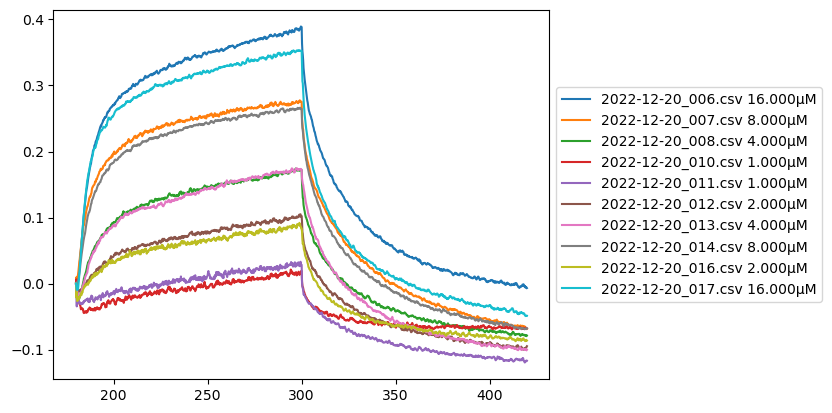

In [171]:
for ds in exp.datasets:
    print(ds)
exp.interstep_correction()
exp.plot()

In [172]:
#assign conentrations to controls
controls_c = [1,2,4,8,16]
controls_c = [c*1e-6 for c in controls_c]

for ds, c in zip(controls, controls_c):
    ds.steps[0].concentration = c




1.6e-05
c= 1.6e-05
8e-06
c= 8e-06
4e-06
c= 4e-06
1e-06
c= 1e-06
1e-06
c= 1e-06
2e-06
c= 2e-06
4e-06
c= 4e-06
8e-06
c= 8e-06
2e-06
c= 2e-06
1.6e-05
c= 1.6e-05
Exp.params is None. Fit and offset plots are not available


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

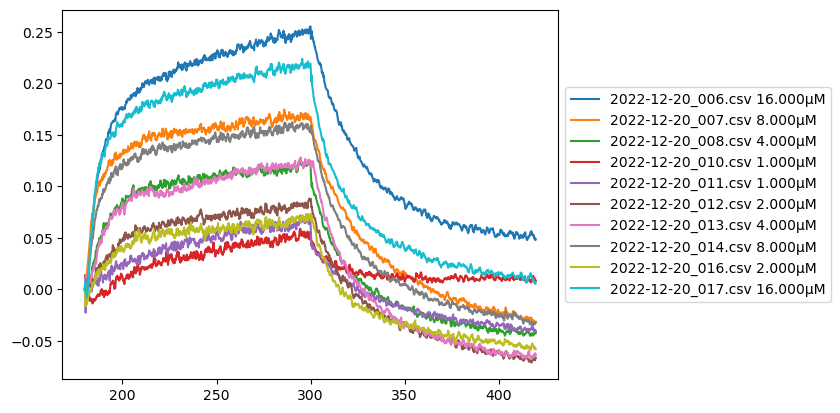

In [173]:
controls_dict = {}
for ds in controls:
    control_mask = ds.t>=ds.steps[0].start
    c = ds.steps[0].concentration
    controls_dict[c] = ds.response[control_mask]

#subtract controls from ds
for ds in exp:
    if not ds.use_for_fit: continue
    print(ds.steps[0].concentration)
    start = ds.steps[0].start
    mask = ds.t>=start
    r = ds.response[mask]
    c = ds.steps[0].concentration
    if c in controls_dict:
        print('c=',c)
        ds.response[mask] = np.subtract(r, controls_dict[c])
        

exp.plot()

In [174]:
exp.crop(5)

Exp.params is None. Fit and offset plots are not available


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

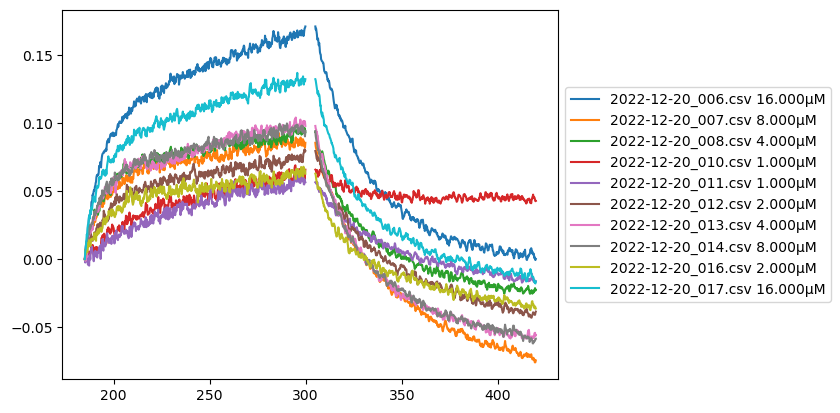

In [175]:
exp.interstep_correction()
exp.plot()

In [176]:
exp.model = models.One_to_one()
exp.model.params_definitions

{'ka': <Parameter 'ka', value=10000.0, bounds=[10.0:10000000.0]>,
 'kd': <Parameter 'kd', value=0.01, bounds=[1e-06:0.1]>,
 'kt': <Parameter 'kt', value=10000000.0, bounds=[10.0:1000000000000.0]>,
 'ymax': <Parameter 'ymax', value=1, bounds=[1e-12:1000]>,
 'offset': <Parameter 'offset', value=0, bounds=[-1000:1000]>}

In [177]:

exp.model.params_definitions['ymax'].user_data['type']='global'

exp.model.params_definitions['offset'].min= -0.1
exp.model.params_definitions['offset'].max= 0.1
exp.model.params_definitions['ymax'].max= 1
exp.model.params_definitions['ka'].max= 1e5
exp.model.params_definitions['ka'].min= 100

for ds in exp:
    if ds.steps[0].concentration == 16e-6:
        ds.use_for_fit = False

exp.create_params(offsets=True, mtl = False)



In [178]:
exp.fit_params()

Dataset 0 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 0 are not finite. LMFIT is set to omit.
Dataset 1 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 1 are not finite. LMFIT is set to omit.
Dataset 2 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 2 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 3 are not finite. LMFIT is set to omit.
Dataset 4 will be ommited. It does not contain any step with concentration>0.
Nan and inf are not valid responses. Some values in dataset 4 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 5 are not finite. LMFIT is set to omit.
Nan and inf are not valid responses. Some values in dataset 6 are not finite. LMFIT is s

'`ftol` termination condition is satisfied.'

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

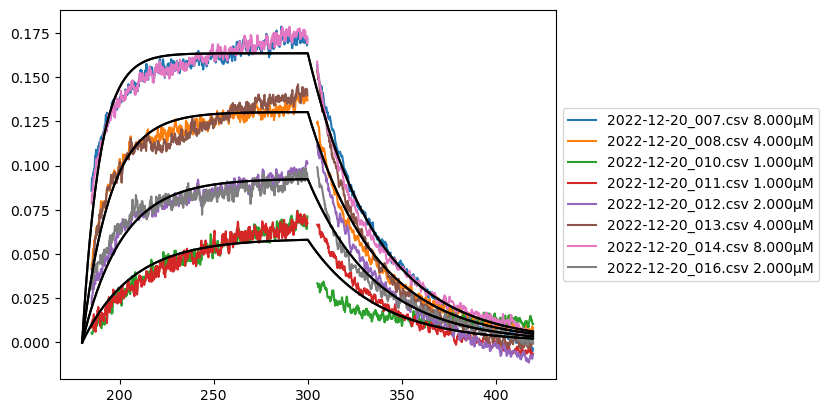

In [181]:
exp.plot(fit=True, correct_offsets=True)

In [182]:
exp.result

In [183]:
for ds in exp:
    if ds.steps[0].concentration == 16e-6:
        ds.use_for_fit = False

In [197]:
import plotly.graph_objects as go

fig = go.Figure()

for ds in exp.datasets:
    if ds.use_for_fit == False: continue
    x = np.array([])
    y = np.array([])
    y_fit = np.array([])
    
    for step in ds.steps:
        # if step.concentration>0: color = 'orangered'
        # elif step.concentration==0: color = 'cornflowerBlue'
        # else: color = 'lightgrey'
        mask = (ds.t>=step.start) & (ds.t<step.stop)

        if f"offset_ds{ds.index}_step{step.index}" in exp.params:
                offset = exp.params[f'offset_ds{ds.index}_step{step.index}'].value
        else: 
            offset = 0
        
        x_step = ds.t[mask]
        y_step = ds.response[mask] - offset
        y_fit_step = ds.fit_response[mask] - offset

        x = np.concatenate([x, x_step])
        y = np.concatenate([y, y_step])
        y_fit = np.concatenate([y_fit, y_fit_step])

        
    fig.add_scatter(x = x, 
                    y = y_fit,
                    marker=dict(size=0, 
                            color='black',
                            line=dict(width=1, color='black')),
                    line=dict(
                         width=2, 
                         color='black'
                         ),
                    name=ds.steps[0].concentration,)

        

    fig.add_scatter(x = x,
                    y = y,
                    marker=dict(
                            size=0, 
                            #color=color, 
                            line=dict(
                                    width=0.1, 
                                    #color=color
                                    )),
                    line=dict(
                            width=1, 
                            #color=color
                            ),
                    name=f"{ds.index}_{ds.steps[0].concentration}",
                    )



fig.update_layout(
            height=600,
            width = 800,
            font_family="Arial",
            showlegend=False,
            margin=dict(l=0,r=0,b=0,t=0,pad=0), 
            template='simple_white',
            paper_bgcolor="rgb(255, 255, 255)",  
            plot_bgcolor="rgb(255, 255, 255)") 

fig.update_xaxes(
    ticklabelposition="inside top", 
    title='time [s]',
    showline=True, 
    linewidth=1, 
    linecolor='black', 
    mirror=True)

fig.update_yaxes(
    ticklabelposition="inside top", 
    title='Response [nm]',
    showline=True, 
    linewidth=1, 
    linecolor='black', 
    mirror=True)


fig.show()

In [191]:
for ds in exp:
    if ds.index in [9, 11, 12, 6]:
        ds.use_for_fit = False
    if ds.index in []:
        ds.use_for_fit = True


In [71]:
exp

<Exp>: Model = <One to one> (53 params), Datasets = 17, fitted = Yes
	<Dataset(0, name = 2022-12-20_001.csv, no_steps = 2, len = 419.8, baseline = (150.0, 180.0), use_for_fit = False)>
		<Step(0, start = 180.0, stop = 300.0, len = 120.0, c = 0.0, type = Association)>
		<Step(1, start = 300.0, stop = 420, len = 120.0, c = 0, type = Dissociation)>
	<Dataset(1, name = 2022-12-20_002.csv, no_steps = 2, len = 419.8, baseline = (150.0, 180.0), use_for_fit = False)>
		<Step(0, start = 180.0, stop = 300.0, len = 120.0, c = 0.0, type = Association)>
		<Step(1, start = 300.0, stop = 420, len = 120.0, c = 0, type = Dissociation)>
	<Dataset(2, name = 2022-12-20_003.csv, no_steps = 2, len = 419.8, baseline = (150.0, 180.0), use_for_fit = False)>
		<Step(0, start = 180.0, stop = 300.0, len = 120.0, c = 0.0, type = Association)>
		<Step(1, start = 300.0, stop = 420, len = 120.0, c = 0, type = Dissociation)>
	<Dataset(3, name = 2022-12-20_004.csv, no_steps = 2, len = 419.8, baseline = (150.0, 180.0), 